In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_rel

In [59]:
# read in each csv for all languages
# get only the values from convergence
# for each bias type
# pointplot them on one chart

"""
lang, steps, F1
zh, 35190, 0.56
es, 35190, 0.6 OR 41310, 0.61
de, 36720, 0.63
ja, 44370, 0.62
multi, 78540, 0.845
en, 27050, 0.65

en_scrubbed, 26520, 0.65

"""

'\nlang, steps, F1\nzh, 35190, 0.56\nes, 35190, 0.6 OR 41310, 0.61\nde, 36720, 0.63\nja, 44370, 0.62\nmulti, 78540, 0.845\nen, 27050, 0.65\n\nen_scrubbed, 26520, 0.65\n\n'

In [28]:
lang2convergence = {
    "zh": 35720, #35190,
    "es": 35720, #35190, #OR 41310, 0.61
    "de": 35720, #36720,
    "ja": 42864, #44370,
    #"multi": 100644, # 78540,
    "en": 28576, #27050,
    "en_scrubbed": 25000, #26520
}


In [4]:
pattern = "/home/ec2-user/SageMaker/efs/sgt/results/{}/{}_ensemble.csv"
multi_pattern = "/home/ec2-user/SageMaker/efs/sgt/results/{}/multi+en_{}_ensemble.csv"

In [26]:
master_df = pd.DataFrame()
for lang, steps in lang2convergence.items():
    print(lang)
    df = pd.read_csv(pattern.format(lang, lang))
    #print(df)
    if lang == "en_scrubbed":
        df["lang"] = "en_scrubbed"
    mask = df["steps"] == lang2convergence[lang]
    df = df[mask]
    master_df = master_df.append(df)
    #myplot = sns.scatterplot(data=df, x="steps", y="performance_gap")

zh
   bias_cat_1_mean  bias_cat_2_mean  performance_gap  \
8         3.717938         3.636769         0.081169   

   statistical_significance bias_cat_1_name bias_cat_2_name bias_type  steps  \
8              3.309333e-17            male          female    gender  35720   

  lang  
8   zh  
es
   bias_cat_1_mean  bias_cat_2_mean  performance_gap  \
8         2.472973         2.652703         -0.17973   

   statistical_significance bias_cat_1_name bias_cat_2_name bias_type  steps  \
8              3.131557e-22            male          female    gender  35720   

  lang  
8   es  
de
    bias_cat_1_mean  bias_cat_2_mean  performance_gap  \
8          3.216250         3.146250         0.070000   
23         2.954687         2.845956         0.108732   

    statistical_significance   bias_cat_1_name    bias_cat_2_name bias_type  \
8               3.491646e-08              male             female    gender   
23              6.944697e-38  race: privileged  race: minoritized      race  

In [10]:
mask = master_df["bias_type"] == "rank"
master_df = master_df[~mask]

# add column
master_df["mono_multi"] = "mono"

In [12]:
df_s = pd.read_csv(pattern.format("en_scrubbed", "en_scrubbed"))

In [27]:
df_s

,bias_cat_1_mean,bias_cat_2_mean,performance_gap,statistical_significance,bias_cat_1_name,bias_cat_2_name,bias_type,steps,lang
0,2.844032,2.880631,-0.036599,9.082177e-08,male,female,gender,12500,en_scrubbed
1,2.853604,2.905405,-0.051802,2.963154e-12,male,female,gender,15625,en_scrubbed
2,2.861486,2.921734,-0.060248,1.526799e-13,male,female,gender,18750,en_scrubbed
3,2.895833,2.948761,-0.052928,4.680361e-10,male,female,gender,21875,en_scrubbed
4,2.894707,2.952140,-0.057432,2.249835e-12,male,female,gender,25000,en_scrubbed
5,2.909347,2.970721,-0.061374,5.270375e-14,male,female,gender,28125,en_scrubbed
6,2.679054,2.708896,-0.029842,3.561352e-05,male,female,gender,3125,en_scrubbed
7,2.937500,2.987613,-0.050113,5.506629e-09,male,female,gender,31250,en_scrubbed
8,2.948198,2.993243,-0.045045,1.588291e-08,male,female,gender,34375,en_scrubbed
9,2.921171,2.990991,-0.069820,1.596006e-17,male,female,gender,37500,en_scrubbed


In [65]:
master_df_multi = pd.DataFrame()
for lang, steps in lang2convergence.items():
    print(lang)
    df = pd.read_csv(multi_pattern.format(lang, lang))
    mask = df["steps"] == 100644
    df = df[mask]
    #print(set(df['lang'].values))
    master_df_multi = master_df_multi.append(df)

zh
es
de
ja
en


In [66]:
mask = master_df_multi["bias_type"] == "rank"
master_df_multi = master_df_multi[~mask]

master_df_multi["mono_multi"] = "multi"

In [67]:
master_df_multi

,bias_cat_1_mean,bias_cat_2_mean,performance_gap,statistical_significance,bias_cat_1_name,bias_cat_2_name,bias_type,steps,lang,mono_multi
0,4.342127,4.306412,0.035714,2.213926e-02,male,female,gender,100644,zh,multi
0,4.283108,4.304730,-0.021622,2.615862e-01,male,female,gender,100644,es,multi
0,4.709375,4.587500,0.121875,6.383766e-08,male,female,gender,100644,de,multi
6,4.526562,4.407353,0.119210,3.708681e-26,race: privileged,race: minoritized,race,100644,de,multi
0,4.521557,4.596407,-0.074850,1.077090e-03,male,female,gender,100644,ja,multi
12,4.236527,3.851297,0.385230,2.905157e-15,race: privileged,race: minoritized,race,100644,ja,multi
0,4.774212,4.714527,0.059685,5.215821e-08,male,female,gender,100644,en,multi
6,4.661824,4.630068,0.031757,1.636902e-02,race: privileged,race: minoritized,race,100644,en,multi


In [68]:
full_data = master_df.append(master_df_multi)

In [ ]:
full_data

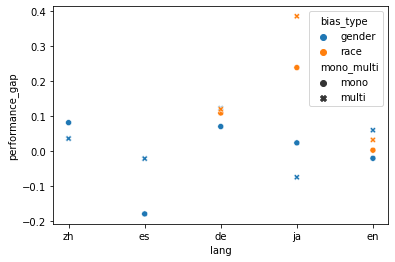

In [70]:
myplot = sns.scatterplot(data=full_data, x="lang", y="performance_gap", hue="bias_type", style="mono_multi")

In [40]:
plt.show()
plt.savefig("all_data.png")

<Figure size 432x288 with 0 Axes>

In [95]:
full_pattern = "/home/ec2-user/SageMaker/efs/sgt/results/{}/full_output/{}_ensemble_all_data.csv"
full_multi_pattern = "/home/ec2-user/SageMaker/efs/sgt/results/{}/full_output/multi+en_{}_ensemble_all_data.csv"

In [78]:
master_df_full = pd.DataFrame()
for lang, steps in lang2convergence.items():
    print(lang)
    df = pd.read_csv(full_pattern.format(lang, lang))
    #print(df)
    mask = df["steps"] == lang2convergence[lang]
    df = df[mask]
    master_df_full = master_df_full.append(df)
    #myplot = sns.scatterplot(data=df, x="steps", y="performance_gap")

zh
es
de
ja
en


In [79]:
master_df_full["mono_multi"] = "mono"

In [96]:
master_df_full_multi = pd.DataFrame()
for lang, steps in lang2convergence.items():
    print(lang)
    df = pd.read_csv(full_multi_pattern.format(lang, lang))
    mask = df["steps"] == 100644
    df = df[mask]
    #print(set(df['lang'].values))
    master_df_full_multi = master_df_full_multi.append(df)

zh
es
de
ja
en


In [97]:
master_df_full_multi["mono_multi"] = "multi"

In [98]:
all_full_data = master_df_full.append(master_df_full_multi)

In [99]:
mask = all_full_data["bias_type"] == "rank"
all_full_data = all_full_data[~mask]

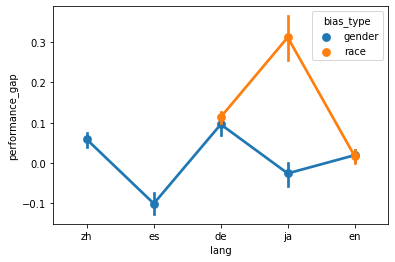

In [100]:
myplot = sns.pointplot(data=all_full_data, x="lang", y="performance_gap", hue="bias_type", style="mono_multi")

In [101]:
all_full_data

,label_1,label_2,performance_gap,bias_cat_1,bias_cat_2,bias_type,steps,lang,mono_multi
19712,3,3,0,male,female,gender,35720,zh,mono
19713,2,2,0,male,female,gender,35720,zh,mono
19714,3,2,1,male,female,gender,35720,zh,mono
19715,2,2,0,male,female,gender,35720,zh,mono
19716,2,2,0,male,female,gender,35720,zh,mono
...,...,...,...,...,...,...,...,...,...
13611,5,5,0,race: privileged,race: minoritized,race,100644,en,multi
13612,5,5,0,race: privileged,race: minoritized,race,100644,en,multi
13613,5,5,0,race: privileged,race: minoritized,race,100644,en,multi
13614,5,5,0,race: privileged,race: minoritized,race,100644,en,multi


In [109]:
# Do statistical significance testing on all mono vs multi by bias type
for lang in set(all_full_data["lang"].values):
    lang_df = all_full_data[all_full_data["lang"] == lang]
    for bias_type in set(lang_df["bias_type"].values):
        bias_df = lang_df[lang_df["bias_type"] == bias_type]
        mono_df = bias_df[bias_df["mono_multi"] == "mono"]
        multi_df = bias_df[bias_df["mono_multi"] == "multi"]
        mono_vals, multi_vals = list(mono_df["performance_gap"].values), list(multi_df["performance_gap"].values)
        
        statistic, p = ttest_rel(mono_vals, multi_vals)
        print(lang, bias_type, p)
        
    

en gender 1.1418588006322148e-09
en race 0.06499549904854918
es gender 1.5045788769198323e-10
ja gender 0.0010240825357853015
ja race 0.003871779909741317
zh gender 0.011679095482775827
de gender 0.04488679785941578
de race 0.447138485531009


In [115]:
### Now graph the performance
type2pattern = {
    "mono": "/home/ec2-user/SageMaker/efs/sgt/results/{}/full_output/{}_ensemble_all_data_emotion_performance.csv",
    "multi": "/home/ec2-user/SageMaker/efs/sgt/results/{}/full_output/multi+en_{}_ensemble_all_data_emotion_performance.csv"
}

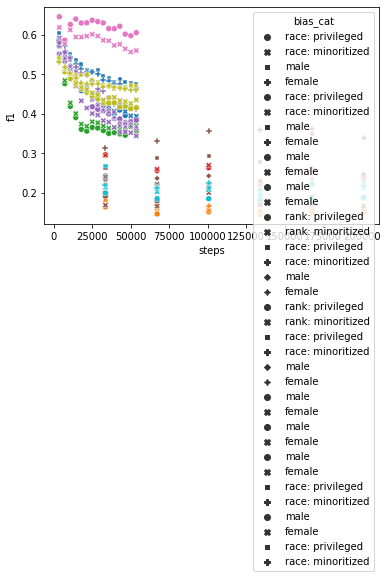

In [118]:
for lang in ["en", "zh", "ja", "es", "de"]:
    for pattern in type2pattern.keys():
        df = pd.read_csv(type2pattern[pattern].format(lang,lang))
        myplot = sns.scatterplot(data=df, x="steps", y="f1", style="bias_cat")
    

124697433